<a href="https://colab.research.google.com/github/LvisRojas/cotrol/blob/main/control_difusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# sistema de segmentacion de clientes

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#variables de entrada
dinero_en_banco = ctrl.Antecedent(np.arange(0,51,1),"dinero") #en millones
salario_cliente = ctrl.Antecedent(np.arange(0,17,1),"salario") #en millones
#variables de salida
pro_preferencial = ctrl.Consequent(np.arange(0,100,1),"probabilidad de que un cliente sea preferencial")

In [ ]:
#funciones de menbresia
#entrada
dinero_en_banco["bajo"]=fuzz.trimf(dinero_en_banco.universe,[0,0,10])
dinero_en_banco["media"]=fuzz.trimf(dinero_en_banco.universe,[5,15,25])
dinero_en_banco["alta"]=fuzz.trapmf(dinero_en_banco.universe,[20,30,50,50])

salario_cliente["muy poco"]=fuzz.trimf(salario_cliente.universe,[0,0,3])
salario_cliente["poco"]=fuzz.trimf(salario_cliente.universe,[2,4,7])
salario_cliente["alto"]=fuzz.trimf(salario_cliente.universe,[5,9,12])
salario_cliente["muy alto"]=fuzz.trapmf(salario_cliente.universe,[10,13,20,20])

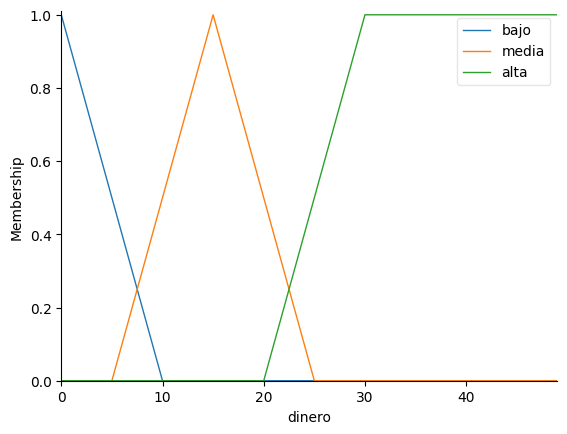

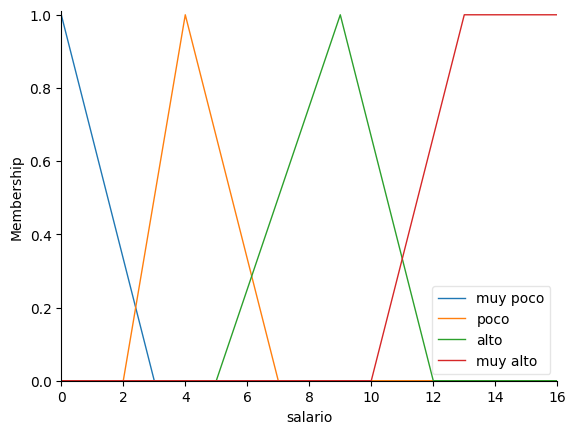

In [ ]:
dinero_en_banco.view()
salario_cliente.view()

In [ ]:
#funcion de menbresia
#salida
pro_preferencial["nula"]=fuzz.trimf(pro_preferencial.universe,[0,0,55]);
pro_preferencial["posible"]=fuzz.trimf(pro_preferencial.universe,[40,60,80]);
pro_preferencial["muy posible"]=fuzz.trimf(pro_preferencial.universe,[70,100,100]);

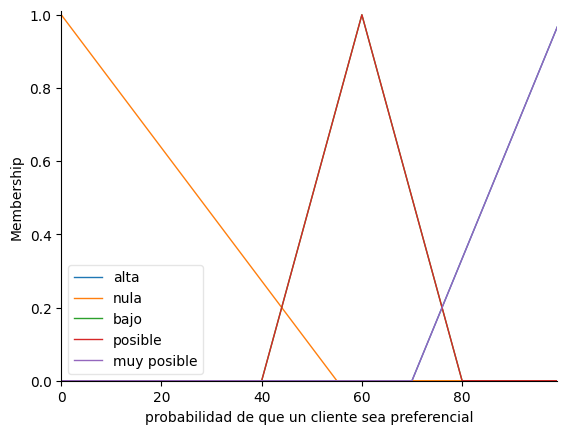

In [ ]:
pro_preferencial.view()

In [ ]:
# reglas difusas
regla11= ctrl.Rule(dinero_en_banco["bajo"] & salario_cliente["muy poco"],pro_preferencial["nula"])
regla12= ctrl.Rule(dinero_en_banco["bajo"] & salario_cliente["poco"],pro_preferencial["nula"])
regla13= ctrl.Rule(dinero_en_banco["bajo"] & salario_cliente["alto"],pro_preferencial["nula"])
regla14= ctrl.Rule(dinero_en_banco["bajo"] & salario_cliente["muy alto"],pro_preferencial["posible"])

regla21= ctrl.Rule(dinero_en_banco["media"] & salario_cliente["muy poco"],pro_preferencial["nula"])
regla22= ctrl.Rule(dinero_en_banco["media"] & salario_cliente["poco"],pro_preferencial["posible"])
regla23= ctrl.Rule(dinero_en_banco["media"] & salario_cliente["alto"],pro_preferencial["posible"])
regla24= ctrl.Rule(dinero_en_banco["media"] & salario_cliente["muy alto"],pro_preferencial["posible"])

regla31= ctrl.Rule(dinero_en_banco["alta"] & salario_cliente["muy poco"],pro_preferencial["nula"])
regla32= ctrl.Rule(dinero_en_banco["alta"] & salario_cliente["poco"],pro_preferencial["posible"])
regla33= ctrl.Rule(dinero_en_banco["alta"] & salario_cliente["alto"],pro_preferencial["posible"])
regla34= ctrl.Rule(dinero_en_banco["alta"] & salario_cliente["muy alto"],pro_preferencial["muy posible"])

In [ ]:
sistema_control = ctrl.ControlSystem(
  [  regla11,
    regla12,
    regla13,
    regla14,
    regla21,
    regla22,
    regla23,
    regla24,
    regla31,
    regla32,
    regla33,
    regla34]
)
controlado = ctrl.ControlSystemSimulation(sistema_control)

In [ ]:
#si tiene 500 M ahorrados y 15M de salario
controlado.input[ "dinero_en_banco" ]=5
controlado.input["salario_cliente"]=15

controlador.compute()

porcentaje_preferencial=controlador.output["pro_preferencial"]
print(f"el porcentaje de ser cliente preferencial es:{porcentaje_preferencial}%")

ValueError: ignored